## Entender o padrão de migração das Andorinhas-azuis
Existem diversas áreas protegidas na América do Sul, para garantir que as espécies que migram ou vivem nessas áreas tem a melhor chance de sobrevivência. 
Carregar os dados de GPS no formato de DataFrame

In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString
birds_df = pd.read_csv('/home/lucas/Downloads/purple_martin.csv')
print("Existem {} difetentes pássaros no dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

Existem 11 difetentes pássaros no dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


Criar um GeoDataFrame com todas as colunas do birds_df, juntamente com a coluna geometry que vai conter pontos(Latitude,Longitude).

Definir o SCR de birds pra {'init': 'epsg:4326'}.

In [4]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))
birds.crs = {'init': 'epsg:4326'}
print(birds.crs)

+init=epsg:4326 +type=crs


/home/lucas/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


<AxesSubplot:>

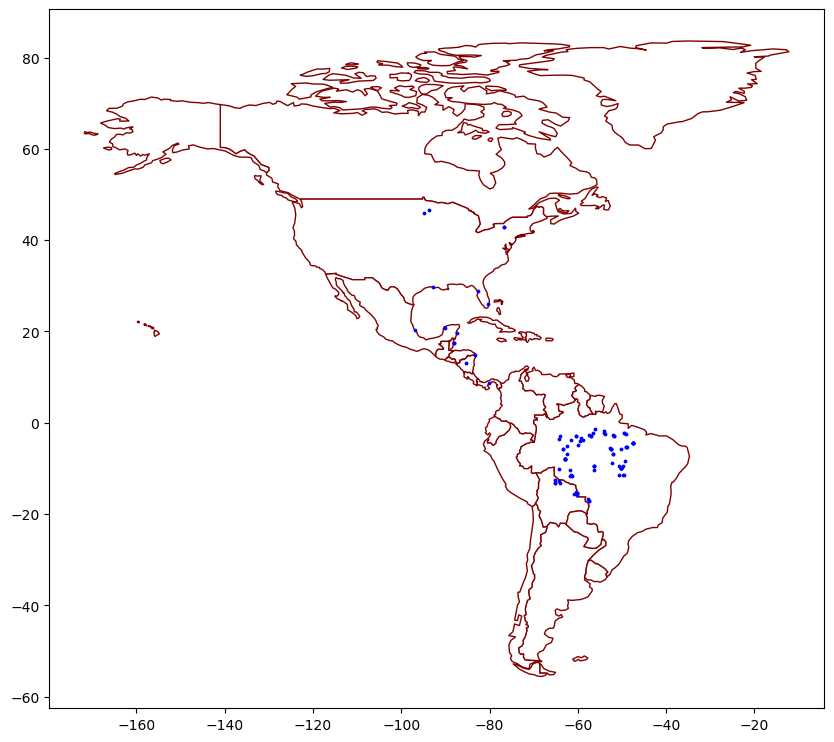

In [6]:
ax = americas.plot(figsize = (10,10), color = 'white', edgecolor = 'maroon')
birds.plot(markersize = 3, color = 'blue', ax = ax)

## Onde cada pássaro começa sua jornada?
path_gdf contém linhas que mostram o caminho de cada pássaro.Usando a função LineString() cria uma linha a partir de pontos

start_gdf contém os pontos de partida de cada pássaro 

In [7]:
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}
start_gdf.head()

/home/lucas/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/lucas/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


Criar um GeoDataFrame end_gdf contendo a localização final de cada pássaro, com o mesmo formato(colunas) do start_gdf

Definir o SCR {'init': 'epsg:4326'}

In [8]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}
end_df.head()

/home/lucas/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.03840)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.19230 -5.70504)
4,30275,POINT (-57.70404 -16.72336)


<AxesSubplot:>

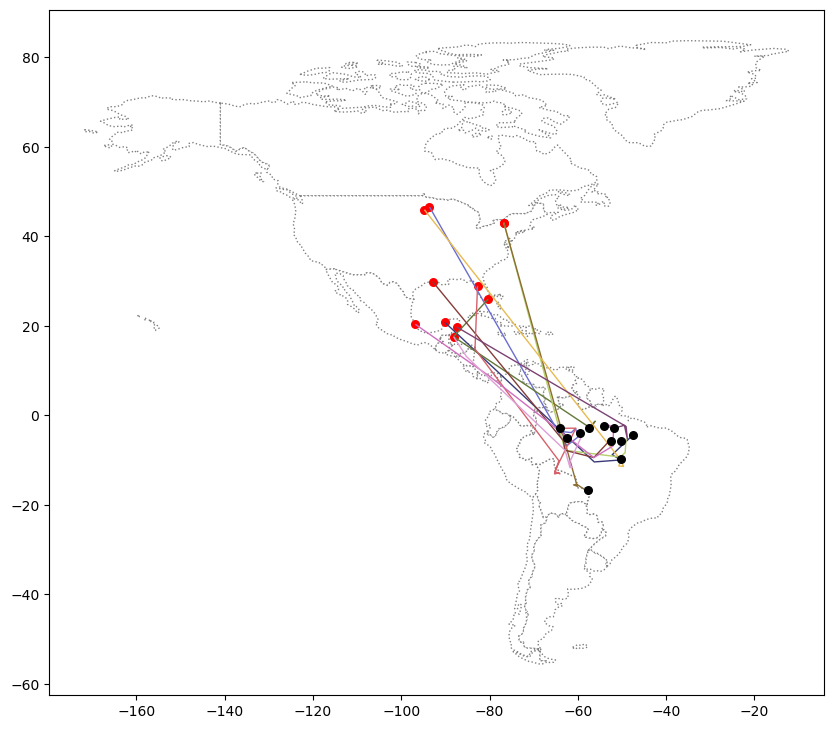

In [9]:
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')
start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

## Onde estão as áreas protegidas na América do Sul?

In [10]:
protected_filepath = "/home/lucas/Python/dados/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"
protected_areas = gpd.read_file(protected_filepath)

<AxesSubplot:>

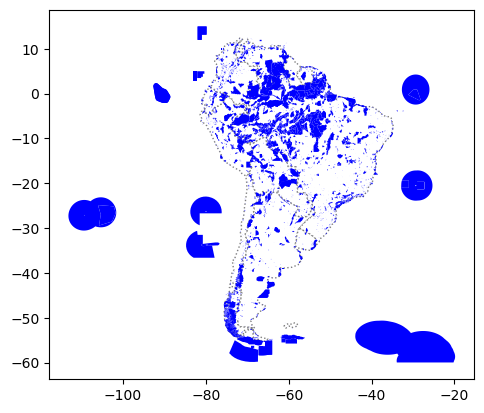

In [11]:
south_america = americas.loc[americas['continent']=='South America']
base = south_america.plot(color = 'white', edgecolor = 'grey', linestyle = ':')
protected_areas.plot(color = 'blue', ax = base)

Calcular a área total protegida na América do Sul(sem incluir áreas no meio do oceano), usando as colunas "REP_AREA" e "REP_M_AREA"(área marinha).

In [12]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))
south_america.head()

South America has 5396761.9116883585 square kilometers of protected areas.


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


Calcular a área de cada país usando o atributo area de cada polígono (com ESPG 3035 como CRS) e somá-las.

In [13]:
AreaTotal = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6
print(AreaTotal)

17759005.81506123


Calcular o percentualda América do Sul protegida

In [14]:
PorcentagemProtegida = P_Area / AreaTotal
print('Aproximadamente {}% da América do Sul é protegida.'.format(round(PorcentagemProtegida*100,2)))

Aproximadamente 30.39% da América do Sul é protegida.


Onde estão os pássaros da América do Sul? 

Gerar um mapa que mostra todos os pássaros, onde foram descobertos e as áreas protegidas.
Pra excluir áreas protegidas que são puramente marinhas, a coluna MARINE deve ser usada. protected_areas[protected_areas['MARINE']!='2'], a coluna MARINE não entra no mapa

<AxesSubplot:>

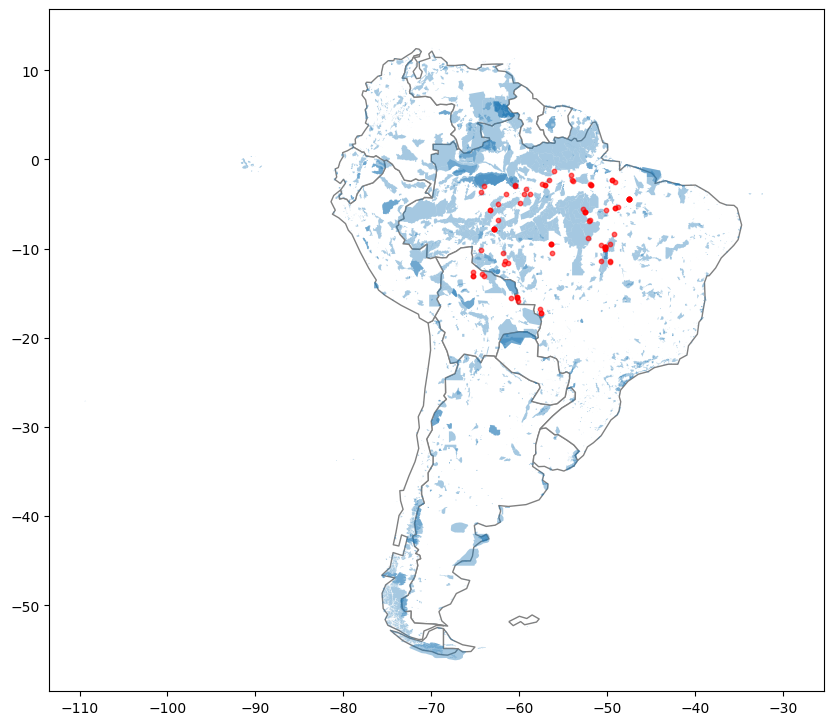

In [15]:
base = south_america.plot(figsize = (10,10), color = 'white', edgecolor = 'gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax = base, alpha = 0.4, zorder = 1)
birds[birds.geometry.y < 0].plot(ax = base, color = 'red',alpha = 0.6, markersize = 10, zorder = 2)